In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
sns.set_style("darkgrid", {"axes.facecolor": ".9"})


In [3]:
countries_indicator = pd.read_csv("./intermediary_files/top_20_countries_and_Aus.csv")
countries_indicator

Country Name  GDP (current US$)  GDP per capita (current US$)  \
0       Australia                1.0                           1.0   
1          Canada                5.0                          11.0   
2     New Zealand               39.0                          15.0   
3          Sweden               14.0                           2.0   
4         Iceland               87.0                          16.0   
5          Norway               19.0                          24.0   
6         Finland               32.0                           7.0   
7         Denmark               27.0                           3.0   
8    Saudi Arabia                9.0                          34.0   
9          Israel               24.0                          17.0   
10        Ireland               22.0                          20.0   
11          Spain                2.0                          28.0   
12        Uruguay               67.0                          40.0   
13          Italy               10.0                          22.0   
14         Brazil                7.0                          64.0   
15          Chile               31.0                          46.0   
16    Netherlands                8.0                           4.0   
17         Mexico                3.0                          61.0   
18  United States              158.0                           5.0   
19    Switzerland               12.0                          25.0   
20      Argentina               16.0                          52.0   

    Life expectancy at birth, total (years)  \
0                                       1.0   
1                                      13.0   
2                                      14.0   
3                                       6.0   
4                                       5.0   
5                                       2.0   
6                                      18.0   
7                                      25.0   
8                                      71.0   
9                                       4.0   
10                                     10.0   
11                                     12.0   
12                                     43.0   
13                                     11.0   
14                                     67.0   
15                                     30.0   
16                                     15.0   
17                                     72.0   
18                                     37.0   
19                                     17.0   
20                                     57.0   

    Population ages 65 and above (% of total population)  \
0                                                 1.0      
1                                                16.0      
2                                                 2.0      
3                                                44.0      
4                                                12.0      
5                                                14.0      
6                                                56.0      
7                                                38.0      
8                                               122.0      
9                                                31.0      
10                                               17.0      
11                                               32.0      
12                                               11.0      
13                                               62.0      
14                                               59.0      
15                                               37.0      
16                                               30.0      
17                                               71.0      
18                                                4.0      
19                                               25.0      
20                                               45.0      

    Population density (people per sq. km of land area)  \
0                                                

In [4]:
mitigations = pd.read_csv("./dataset/owid_oxford_merged.csv")
mitigations = mitigations[mitigations["location"].isin(countries_indicator["Country Name"])]
mitigations["Date"] = pd.to_datetime(mitigations["Date"],format="%Y-%m-%d")
mitigations

iso_code      continent       location        date  total_cases  \
1821       ARG  South America      Argentina  2020-03-04          1.0   
1822       ARG  South America      Argentina  2020-03-06          2.0   
1823       ARG  South America      Argentina  2020-03-07          8.0   
1824       ARG  South America      Argentina  2020-03-08          9.0   
1825       ARG  South America      Argentina  2020-03-09         12.0   
...        ...            ...            ...         ...          ...   
53342      USA  North America  United States  2020-11-05    9486486.0   
53343      USA  North America  United States  2020-11-06    9608922.0   
53344      USA  North America  United States  2020-11-07    9739545.0   
53345      USA  North America  United States  2020-11-08    9860958.0   
53346      USA  North America  United States  2020-11-09    9971651.0   

       new_cases  new_cases_smoothed  total_deaths  new_deaths  \
1821         1.0                 NaN           NaN         0.0   
1822         1.0                 NaN           NaN         0.0   
1823         6.0                 NaN           NaN         0.0   
1824         1.0                 NaN           1.0         1.0   
1825         3.0                 NaN           1.0         0.0   
...          ...                 ...           ...         ...   
53342   102507.0           89780.286      233729.0      1102.0   
53343   122436.0           94681.143      234937.0      1208.0   
53344   130623.0           98874.000      236099.0      1162.0   
53345   121413.0          104942.429      237113.0      1014.0   
53346   110693.0          109184.143      237572.0       459.0   

       new_deaths_smoothed  ...  StringencyIndex  StringencyIndexForDisplay  \
1821                   NaN  ...            11.11                      11.11   
1822                   NaN  ...            11.11                      11.11   
1823                   NaN  ...            11.11                      11.11   
1824                   NaN  ...            11.11                      11.11   
1825                   NaN  ...            11.11                      11.11   
...                    ...  ...              ...                        ...   
53342              861.286  ...            62.50                      62.50   
53343              895.571  ...            62.50                      62.50   
53344              913.000  ...            62.50                      62.50   
53345              936.714  ...            62.50                      62.50   
53346              939.429  ...              NaN                      62.50   

       StringencyLegacyIndex  StringencyLegacyIndexForDisplay  \
1821                   14.29                            14.29   
1822                   14.29                            14.29   
1823                   14.29                            14.29   
1824                   14.29                            14.29   
1825                   14.29                            14.29   
...                      ...                              ...   
53342                  66.67                            66.67   
53343                  66.67                            66.67   
53344                  66.67                            66.67   
53345                  66.67                            66.67   
53346                    NaN                            66.67   

       GovernmentResponseIndex  GovernmentResponseIndexForDisplay  \
1821                     16.67                              16.67   
1822                     16.67                              16.67   
1823                     16.67                              16.67   
1824                     16.67                              16.67   
1825                     16.67                              16.67   
...                        ...                                ...   
53342                    66.07                              66.07   
53343                    66.07                        

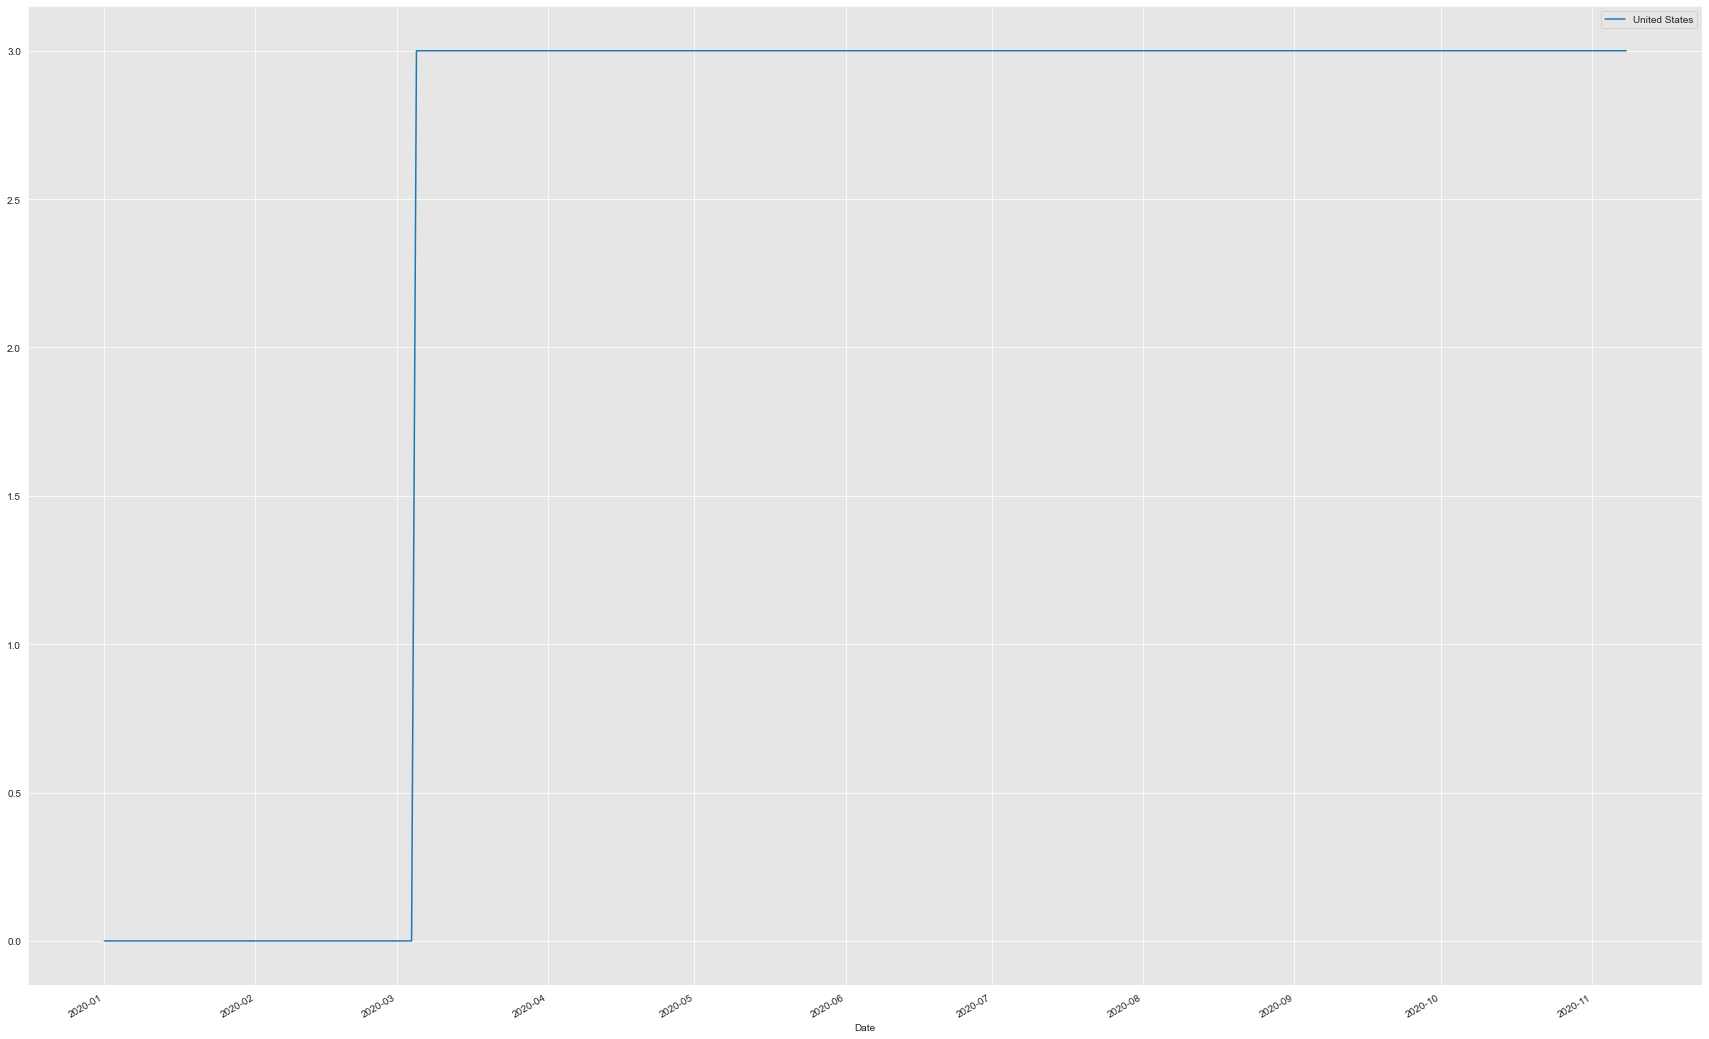

In [5]:
fig,ax = plt.subplots()
for [location,continent], group in mitigations.groupby(["location","continent"]):
    if location=="United States":
         group.plot(x="Date",y="C1_School closing",figsize=(30,20),label=location,ax=ax)

In [6]:
#fig = px.line(mitigations,x="Date",y="C1_School closing",color="location",width=1920,height=1080)
# fig = go.Figure()

fig = (px.area(mitigations,x="Date",y="new_cases_smoothed",color="location",line_group="location",width=1920,height=1080))
fig.add_trace(px.area(mitigations,x="Date",y="new_cases",color="location",line_group="location",width=1920,height=1080).data[0])
fig.show()

In [7]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

COUNTRIES = np.unique(mitigations["location"])
colors = cm.rainbow(np.linspace(0,1,len(COUNTRIES)))*255
for country,color in zip(COUNTRIES,colors):
    # print(color)
    country_df = mitigations.loc[mitigations["location"]==country]
    fig.add_trace(go.Scatter(x=country_df["Date"],y=country_df["new_cases_smoothed"],name=country,legendgroup=country,fill='tozeroy',line=dict(color="rgb({:0f},{:0f},{:0f})".format(*color))),
    secondary_y=False)
    fig.add_trace(go.Scatter(x=country_df["Date"],y=country_df["C1_School closing"],name=country,legendgroup=country,fill='tozeroy',showlegend=False,line=dict(color="rgb({:0f},{:0f},{:0f})".format(*color))),
    secondary_y=True)
fig.update_layout( width=1920,height=1080)
fig.show()

In [8]:
fig = make_subplots(specs=[[{"secondary_y": True}]])


for country in (COUNTRIES):
    # print(color)
    country_df = mitigations.loc[mitigations["location"]==country]
    fig.add_trace(go.Scatter(x=country_df["Date"],y=country_df["new_cases_smoothed"],name=country,legendgroup=country,fill='tozeroy',line=dict(color="#36a2eb")),
    secondary_y=False)
    fig.add_trace(go.Scatter(x=country_df["Date"],y=country_df["C1_School closing"],name=country,legendgroup=country,fill='tozeroy',showlegend=False,line=dict(color="#36a2eb")),
    secondary_y=True)
fig.update_layout( width=1920,height=1080)
fig.show()

In [9]:



for country in (COUNTRIES[:5]):
    # print(color)
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    country_df = mitigations.loc[mitigations["location"]==country]
    COLUMNS_TO_PLOT = ['C1_School closing',      
    # 'C1_Flag',     
       'C2_Workplace closing',
        #  'C2_Flag',
         'C3_Cancel public events',
        #  'C3_Flag',

       'C4_Restrictions on gatherings',
        #  'C4_Flag',
         'C5_Close public transport',

    #    'C5_Flag',
         'C6_Stay at home requirements',
        #  'C6_Flag',

       'C7_Restrictions on internal movement',
        #  'C7_Flag',

       'C8_International travel controls',
         'E1_Income support',
        #  'E1_Flag',
       'E2_Debt/contract relief',
    #    'E3_Fiscal measures',
    #    'E4_International support', 
       'H1_Public information campaigns',
       
    #    'H1_Flag'
        'H2_Testing policy',
        'H3_Contact tracing',
       
    #    'H4_Emergency investment in healthcare'
    #  'H5_Investment in vaccines'
    
       'H6_Facial Coverings',
        # 'H6_Flag'
        'M1_Wildcard']
    colors = cm.rainbow(np.linspace(0,1,len(COLUMNS_TO_PLOT)))*255
    
    for column,color in zip(COLUMNS_TO_PLOT,colors):
        fig.add_trace(go.Scatter(x=country_df["Date"],y=country_df[column],name=column,fill='tozeroy',line=dict(color="rgb({:0f},{:0f},{:0f})".format(*color))),
        secondary_y=True)
    fig.add_trace(go.Scatter(x=country_df["Date"],y=country_df["new_cases_smoothed"],name="Smoothed New Cases",fill='tozeroy',line=dict(color="#36a2eb")),
    secondary_y=False)

    fig.update_layout( width=1920,height=1080,title=country)
    fig.show()

In [10]:
mitigations.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_r

In [20]:
fig = px.scatter_matrix(mitigations[COLUMNS_TO_PLOT + ["new_cases_smoothed"]], width=1920,height=1080)
fig.show()

In [17]:
fig = px.parallel_coordinates(mitigations[COLUMNS_TO_PLOT + ["new_cases_smoothed"]], width=1920,height=1080)
fig.show()

In [19]:
fig = px.parallel_coordinates(StandardScaler().fit_transform(mitigations[COLUMNS_TO_PLOT + ["new_cases_smoothed"]]), width=1920,height=1080)
fig.show()